In [1]:
import sys
sys.path.append("../../")

## 数据

In [2]:
import matplotlib.pyplot as plt
from pylib.utils.functions_for_classification import mixed_2d_2cls, plot_scatter
import numpy as np

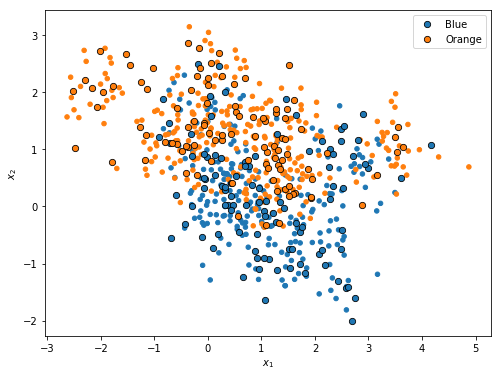

In [3]:
X_train, X_test, y_train, y_test = mixed_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, X_test, y_test)
plt.show()

## 模型

In [4]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', probability=True, random_state=42)
model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [5]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

## 测量

### 准确率

In [6]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.754

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.754

### 混淆矩阵

In [8]:
tn = np.sum(y_pred[y_test == 0] == 0)
tp = np.sum(y_pred[y_test == 1] == 1)
fp = np.sum(y_pred[y_test == 0] == 1)
fn = np.sum(y_pred[y_test == 1] == 0)

confu_matrix = np.array([[tn, fp], [fn, tp]])
confu_matrix

array([[174,  52],
       [ 71, 203]])

In [9]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix(y_test, y_pred)

array([[174,  52],
       [ 71, 203]], dtype=int64)

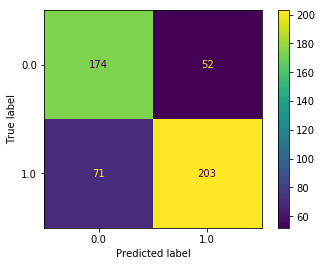

In [10]:
plot_confusion_matrix(model, X_test, y_test)
plt.show()

### 精确率和召回率

精确率：

In [11]:
precision = tp / (tp + fp)
precision

0.796078431372549

In [12]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.796078431372549

召回率:

In [13]:
recall = tp / (tp + fn)
recall

0.7408759124087592

In [14]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7408759124087592

平均精确率：

In [15]:
from sklearn.metrics import average_precision_score

average_precision_score(y_test, y_proba[:, 1])

0.8065716894864143

精确率和召回率曲线：

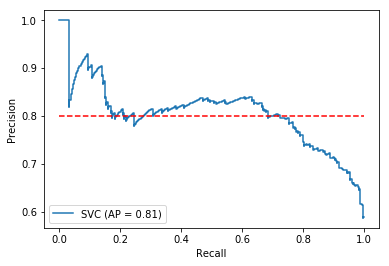

In [16]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, X_test, y_test)
plt.plot([0., 1.], [0.8, 0.8], "r--")
plt.show()

精确率和召回率AUC得分:

In [28]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, y_proba[:, 1])
pr_auc = auc(recall, precision)
pr_auc

0.8057827675020961

F1得分:

In [17]:
f1 = 2 / (1 / precision + 1 / recall)
f1

0.7674858223062382

In [18]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7674858223062382

### ROC曲线

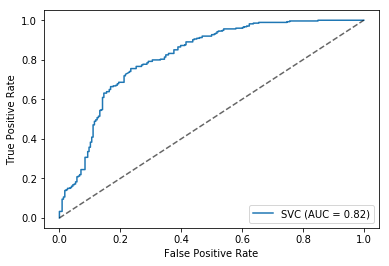

In [24]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, X_test, y_test)
plt.plot([0., 1.], [0., 1.], "k--", alpha=0.6)
plt.show()

ROC AUC得分:

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_score(y_test, y_pred)

0.755393708416769

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc(fpr, tpr)

0.755393708416769